# NGS2 Cycle 1: results

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We begin with preprocessed results from the experimental runs listed in `runs.json`:

In [2]:
data_contributions = {
    "control": (1.09, 0.485),  # mean, se
    "intergroup_competition": (4.72, 0.834),
    "intragroup_competition": (0.868, 0.457),
    "identity_selection": (1.66, 0.61),
    "relative_deprivation": (2.50, 0.77),
    "population_size": (1.19, 1.43),
    "rounds": (1.31, 0.79),
    "interpersonal_communication": (0.62, 0.70),
    "identity_signaling": (1.72, 0.56),
    "scarcity": (1.15, 0.39),
}

data_difi = {
    "control": (33.1, 5.5),  # mean, se
    "intergroup_competition": (24.5, 11.7),
    "intragroup_competition": (9.57, 5.91),
    "identity_selection": (47.8, 7.6),
    "relative_deprivation": (22.9, 10.7),
    "population_size": (43.9, 14.6),
    "rounds": (27.4, 4.5),
    "interpersonal_communication": (20.0, 9.21),
    "identity_signaling": (42.0, 9.41),
    "scarcity": (51.3, 10.0),
}

data_leach = {
    "control": (3.37, 0.14),  # mean, se
    "intergroup_competition": (3.51, 0.15),
    "intragroup_competition": (3.32, 0.15),
    "identity_selection": (3.70, 0.13),
    "relative_deprivation": (3.38, 0.17),
    "population_size": (3.70, 0.18),
    "rounds": (3.47, 0.10),
    "interpersonal_communication": (3.33, 0.13),
    "identity_signaling": (3.49, 0.053),
    "scarcity": (3.40, 0.11),
}

## Results 1: Ingroup vs. public resource contributions

Next we import plotting tools:

In [3]:
import os 
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def print_conditions(results):
    for cnd in enumerate(sorted(results.iterkeys())):
        print(cnd)
    
def plot_contributions(results):
    fig, ax = plt.subplots()
    means = [results[cnd][0] for cnd in sorted(results.iterkeys())]
    ses = [results[cnd][1] for cnd in sorted(results.iterkeys())]
    idxs = np.arange(len(results))
    rects1 = ax.bar(idxs, means, 0.85, color='k', yerr=ses, error_kw=dict(ecolor='#dddddd'))
    ax.set_ylim([-6, 6])
    plt.axhline(y=0, color='k', linestyle='-')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('center')
    ax.set_xticks(idxs)
    plt.ylabel("Log$_2$ ratio of ingroup:outgroup contributions")
    handles, labels = ax.get_legend_handles_labels()
    fig.savefig("contributions.pdf", bbox_inches='tight')
    plt.show()

Now we plot the results:

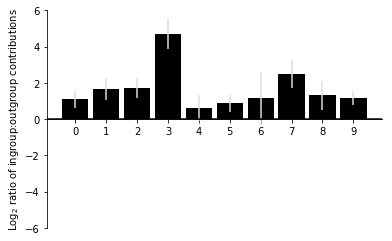

(0, 'control')
(1, 'identity_selection')
(2, 'identity_signaling')
(3, 'intergroup_competition')
(4, 'interpersonal_communication')
(5, 'intragroup_competition')
(6, 'population_size')
(7, 'relative_deprivation')
(8, 'rounds')
(9, 'scarcity')


In [5]:
plot_contributions(data_contributions)
print_conditions(data_contributions)

## Results 2: DIFI

In [6]:
def ratio2difi(ratio, mn=-100, mx=125):
    return mn + (mx - mn) * (1.0 / (1 + math.exp(-ratio)))

def plot_difi(results):
    fig, ax = plt.subplots()
    means = [results[cnd][0] for cnd in sorted(results.iterkeys())]
    ses = [results[cnd][1] for cnd in sorted(results.iterkeys())]
    idxs = np.arange(len(results))
    rects1 = ax.bar(idxs, means, 0.85, color='k', yerr=ses, error_kw=dict(ecolor='#dddddd'))
    ax.set_ylim([-100, 125])
    plt.axhline(y=0, color='k', linestyle='-')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks(idxs)
    plt.ylabel("DIFI Distance")
    fig.savefig("difi.pdf", bbox_inches='tight')
    plt.show()

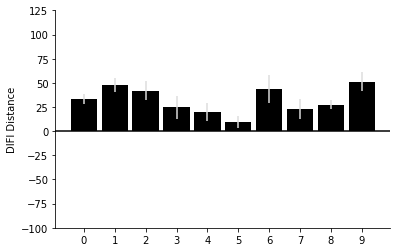

(0, 'control')
(1, 'identity_selection')
(2, 'identity_signaling')
(3, 'intergroup_competition')
(4, 'interpersonal_communication')
(5, 'intragroup_competition')
(6, 'population_size')
(7, 'relative_deprivation')
(8, 'rounds')
(9, 'scarcity')


In [7]:
plot_difi(data_difi)
print_conditions(data_difi)

## Results 3: Leach et al. (2008) survey

Predictons for the Leach et al. (2008) survey:

In [8]:
def plot_leach(results):
    fig, ax = plt.subplots()
    means = [results[cnd][0] for cnd in sorted(results.iterkeys())]
    ses = [results[cnd][1] for cnd in sorted(results.iterkeys())]
    idxs = np.arange(len(results))
    rects1 = ax.bar(idxs, means, 0.85, color='k', yerr=ses, error_kw=dict(ecolor='#dddddd'))
    ax.set_ylim([1, 7])
    plt.axhline(y=0, color='k', linestyle='-')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks(idxs)
    plt.ylabel("Average Leach et al. (2008) survey response")
    fig.savefig("leach.pdf", bbox_inches='tight')
    plt.show()

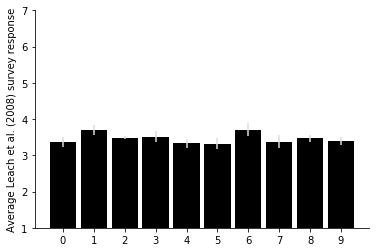

(0, 'control')
(1, 'identity_selection')
(2, 'identity_signaling')
(3, 'intergroup_competition')
(4, 'interpersonal_communication')
(5, 'intragroup_competition')
(6, 'population_size')
(7, 'relative_deprivation')
(8, 'rounds')
(9, 'scarcity')


In [9]:
plot_leach(data_leach)
print_conditions(data_leach)